In [1]:
# Import pandas
import pandas as pd
# Call function to load data
df = pd.read_csv("C:\\Users\Abdulrahman\Downloads\Salary_dataset.csv") 


In [2]:
# Print first few rows of data
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
# Print summary statistics

df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [4]:
# Print correlation matrix

df.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [5]:
#import libraries
import pandas as pdfrom
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#split into train and test sets

x = df[['Unnamed: 0', 'YearsExperience']] 
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


from sklearn.linear_model import LinearRegression

# Create linear regression object
lr = LinearRegression()

# Fit the model  
lr.fit(x_train, y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(x_test)

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)
#root mean square error

rmse = np.sqrt(mse)

print('RMSE: ', rmse)


MSE:  72022809.99529594
RMSE:  8486.625359664225


In [8]:
#model selection
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print('RMSE for Random Forest: ', rmse_rf)

RMSE for Random Forest:  8005.366509003681


In [9]:
# Create new feature by combining existing features
df['ExperienceSquared'] = df['YearsExperience'] ** 2

In [10]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
print('Best RMSE after hyperparameter tuning: ', rmse_best)

Best RMSE after hyperparameter tuning:  8552.12800152362


In [11]:
# Identify and remove outliers using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df))
filtered_df = df[(z_scores < 3).all(axis=1)]

In [12]:
#data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
# Assuming you have updated features or model selection
# Retrain the model
lr.fit(x_train, y_train)

# Obtain new predictions after retraining
y_pred_retrained = lr.predict(x_test)

In [14]:
# Assuming you have retrained the model and obtained new predictions y_pred_retrained
mse_retrained = mean_squared_error(y_test, y_pred_retrained)
rmse_retrained = np.sqrt(mse_retrained)
print('RMSE for the retrained model: ', rmse_retrained)

RMSE for the retrained model:  8486.625359664225


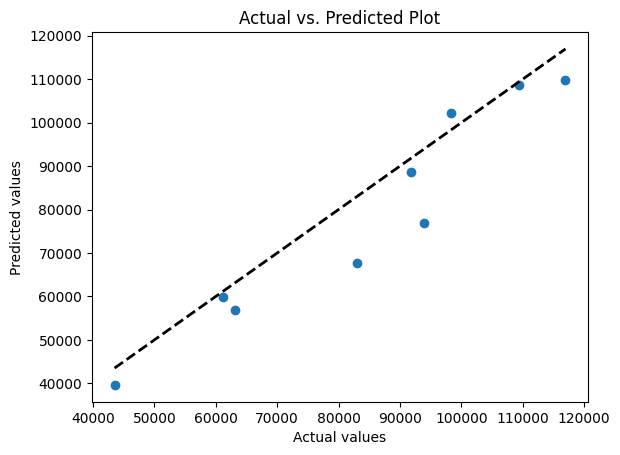

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Plot')
plt.show()